In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset= pd.read_csv("D:/ML DataSet/P39-Minimizing-Churn-Data/churn_data.csv")

In [3]:
dataset.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


In [4]:
dataset.shape

(27000, 31)

In [5]:
dataset.dtypes

user                         int64
churn                        int64
age                        float64
housing                     object
credit_score               float64
deposits                     int64
withdrawal                   int64
purchases_partners           int64
purchases                    int64
cc_taken                     int64
cc_recommended               int64
cc_disliked                  int64
cc_liked                     int64
cc_application_begin         int64
app_downloaded               int64
web_user                     int64
app_web_user                 int64
ios_user                     int64
android_user                 int64
registered_phones            int64
payment_type                object
waiting_4_loan               int64
cancelled_loan               int64
received_loan                int64
rejected_loan                int64
zodiac_sign                 object
left_for_two_month_plus      int64
left_for_one_month           int64
rewards_earned      

In [6]:
dataset.isnull().sum()

user                          0
churn                         0
age                           4
housing                       0
credit_score               8031
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
reward_rate                   0
is_referred                   0
dtype: i

In [7]:
dataset.columns.unique()

Index(['user', 'churn', 'age', 'housing', 'credit_score', 'deposits',
       'withdrawal', 'purchases_partners', 'purchases', 'cc_taken',
       'cc_recommended', 'cc_disliked', 'cc_liked', 'cc_application_begin',
       'app_downloaded', 'web_user', 'app_web_user', 'ios_user',
       'android_user', 'registered_phones', 'payment_type', 'waiting_4_loan',
       'cancelled_loan', 'received_loan', 'rejected_loan', 'zodiac_sign',
       'left_for_two_month_plus', 'left_for_one_month', 'rewards_earned',
       'reward_rate', 'is_referred'],
      dtype='object')

In [8]:
#Removing the null values
dataset=dataset[pd.notnull(dataset['age'])]

In [9]:
dataset.isnull().sum()

user                          0
churn                         0
age                           0
housing                       0
credit_score               8027
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3223
reward_rate                   0
is_referred                   0
dtype: i

In [10]:
dataset=dataset.drop(columns=['credit_score','rewards_earned'])

In [11]:
dataset.shape

(26996, 29)

In [12]:
#Creation of histogram
dataset2= dataset.drop(columns=['user','churn'])

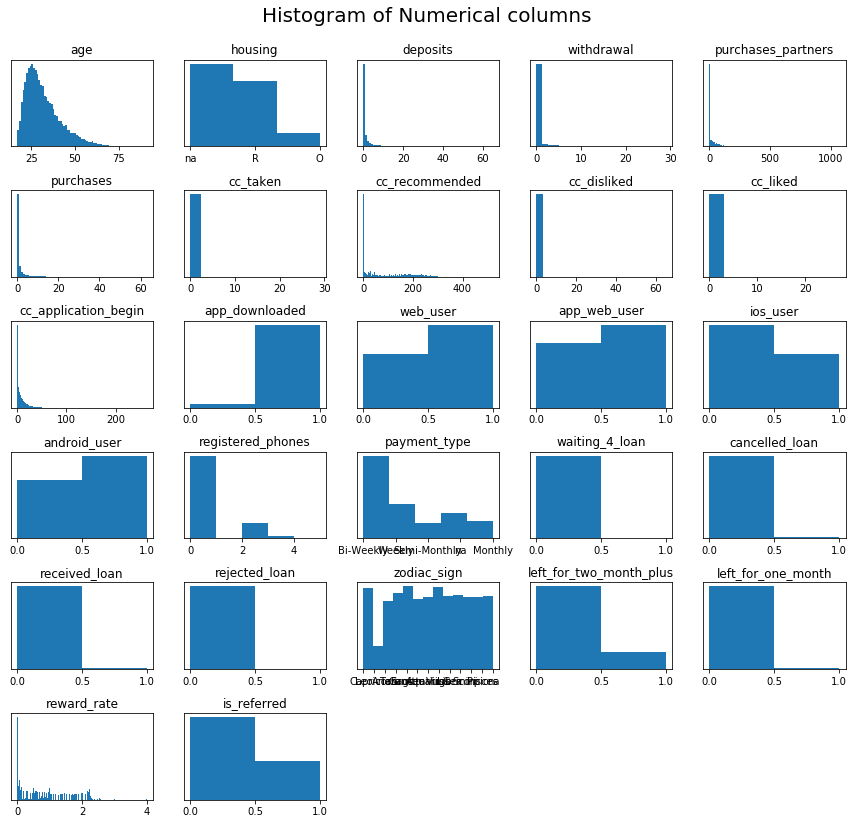

In [13]:
fig= plt.figure(figsize=(12,12))
plt.suptitle("Histogram of Numerical columns",fontsize=20)
for i in range(1,dataset2.shape[1]+1):
    plt.subplot(6,5,i)
    f=plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i-1])
    vals= np.size(dataset2.iloc[:,i-1].unique())
    plt.hist(dataset2.iloc[:,i-1],bins=vals)
plt.tight_layout(rect=[0,0.03,1,0.95])
    

In [14]:
dataset3= dataset[['housing','is_referred',
       'app_downloaded', 'web_user', 'ios_user',
       'android_user', 'registered_phones', 'payment_type', 'waiting_4_loan',
       'cancelled_loan', 'received_loan', 'rejected_loan', 'zodiac_sign',
       'left_for_two_month_plus', 'left_for_one_month','is_referred']]

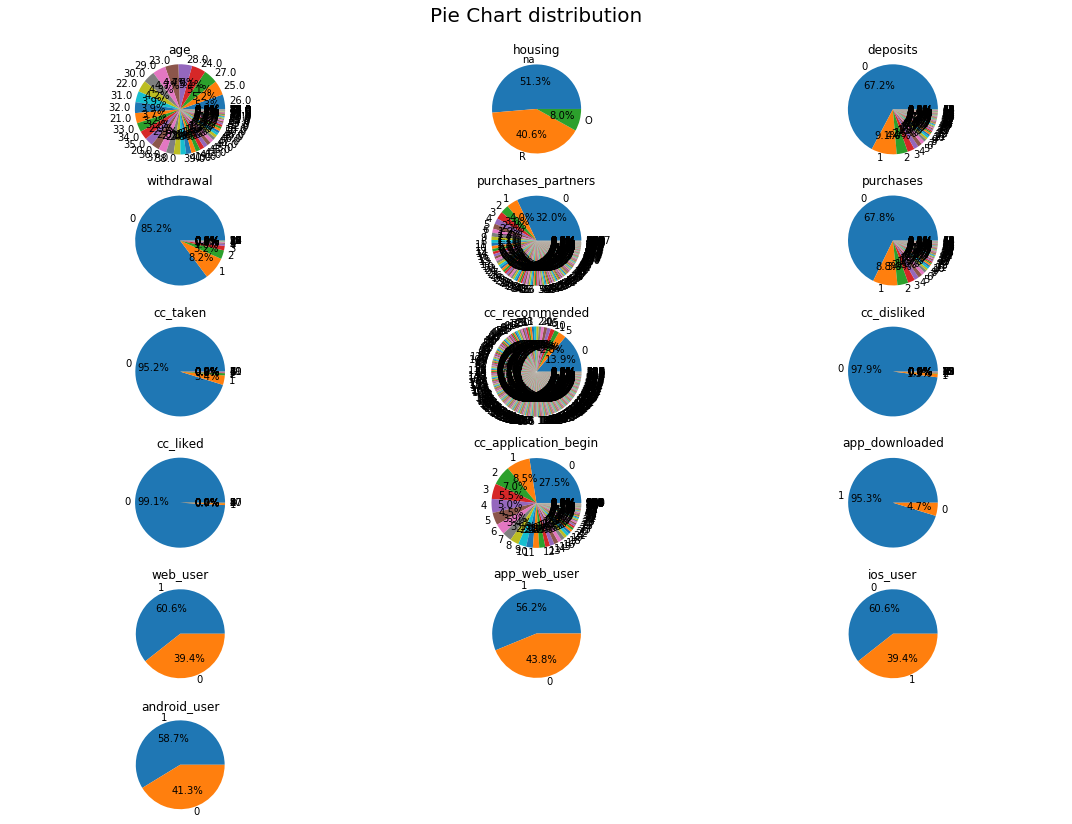

In [15]:
fig= plt.figure(figsize=(15,12))
plt.suptitle("Pie Chart distribution",fontsize=20)
for i in range(1, dataset3.shape[1] + 1):
    plt.subplot(6,3,i)
    f=plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i-1])
    values=dataset2.iloc[:,i-1].value_counts(normalize=True).values
    index= dataset2.iloc[:,i-1].value_counts(normalize=True).index
    
    plt.pie(values,labels=index,autopct='%1.1f%%')
    plt.axis('equal')
    
plt.tight_layout(rect=[0,0.03,1,0.95])

In [16]:
dataset[dataset3.waiting_4_loan ==1 ].churn.value_counts()

0    27
1     8
Name: churn, dtype: int64

In [17]:
dataset[dataset.cancelled_loan ==1].churn.value_counts()

1    274
0    234
Name: churn, dtype: int64

In [18]:
dataset[dataset3.received_loan ==1].churn.value_counts()

1    292
0    199
Name: churn, dtype: int64

In [19]:
dataset[dataset3.rejected_loan ==1].churn.value_counts()

1    107
0     25
Name: churn, dtype: int64

In [20]:
dataset[dataset3.left_for_one_month ==1].churn.value_counts()

1    266
0    222
Name: churn, dtype: int64

In [21]:
#Exploring uneven feature

dataset['payment_type'].value_counts()

Bi-Weekly       12713
Weekly           5289
na               3899
Monthly          2656
Semi-Monthly     2439
Name: payment_type, dtype: int64

In [22]:
dataset['zodiac_sign'].value_counts()

Cancer         2424
Virgo          2410
Leo            2374
Taurus         2236
Gemini         2168
na             2155
Libra          2128
Pisces         2127
Scorpio        2118
Aquarius       2117
Sagittarius    2056
Aries          2001
Capricorn       682
Name: zodiac_sign, dtype: int64

In [23]:
dataset['housing'].value_counts()

na    13856
R     10969
O      2171
Name: housing, dtype: int64

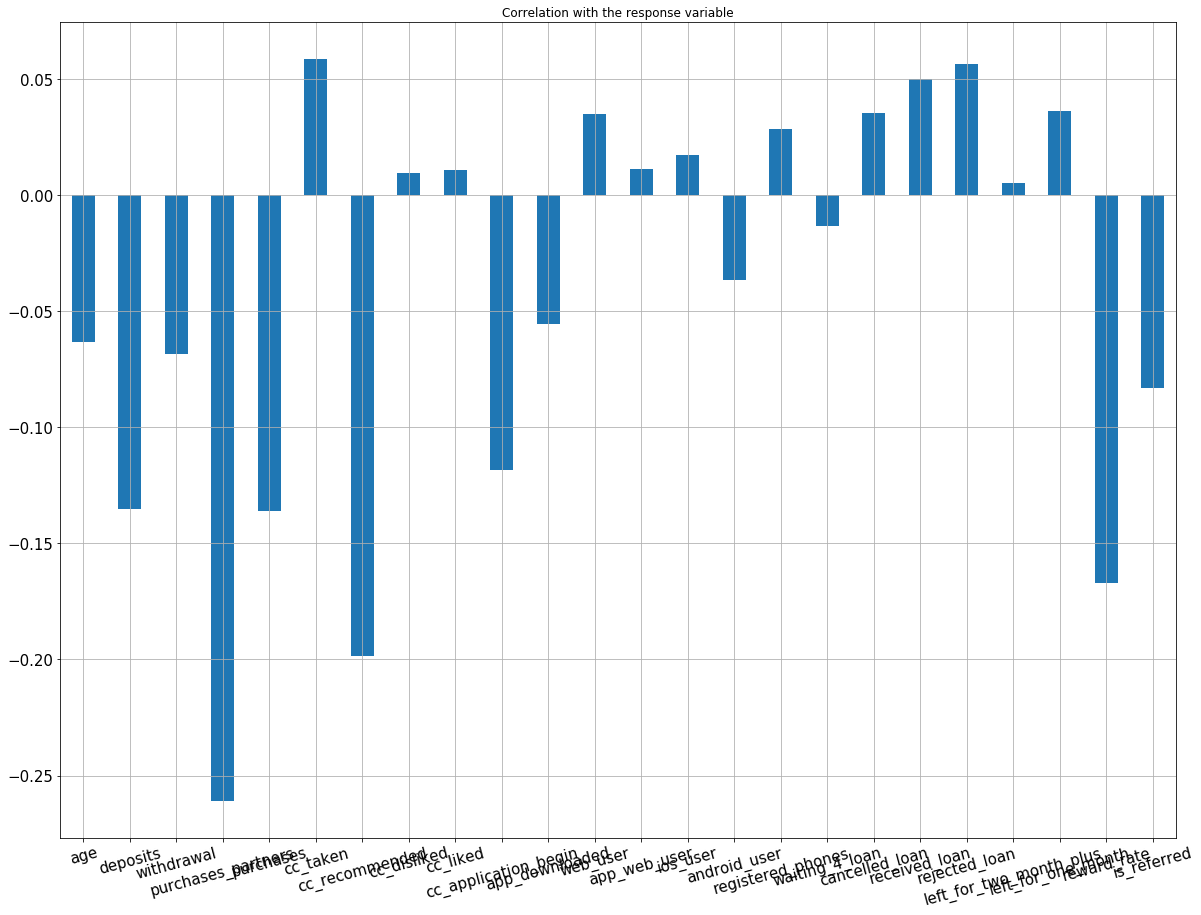

In [24]:
dataset.drop(columns=['user','churn','housing','zodiac_sign']).corrwith(dataset.churn).plot.bar(figsize=(20,15),
                      title="Correlation with the response variable", fontsize=15,rot=15,grid=True)

In [25]:
#Disply Correlation matrix
corr= dataset.drop(columns=['user','churn']).corr()

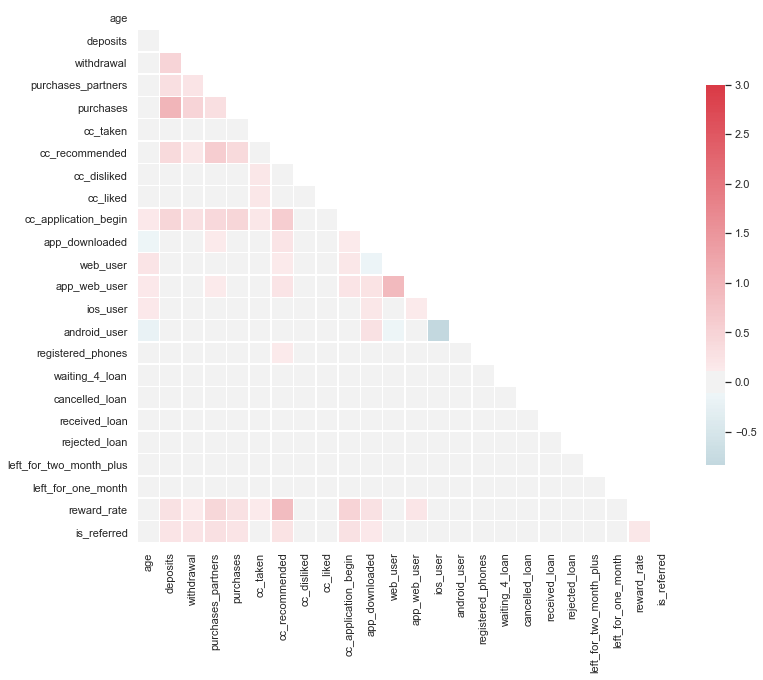

In [26]:
sns.set(style='white')
#Generating mask for upper traingle
mask=np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

f,ax=plt.subplots(figsize=(12,14))
cmap= sns.diverging_palette(220,10,as_cmap=True)



sns.heatmap(corr,mask=mask,cmap=cmap,vmax=3,center=0,square=True,linewidths=0.5,cbar_kws={"shrink":0.5})

In [27]:
dataset.drop(columns=['user','churn']).corr()

,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,...,android_user,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred
age,1.000000,0.088757,0.044177,-0.000943,0.088769,0.077199,0.095860,0.005577,0.019512,0.164872,...,-0.210068,-0.001354,0.004164,-0.003713,-0.001808,0.011030,-0.022500,0.034534,0.086167,-0.001557
deposits,0.088757,1.000000,0.488902,0.326588,0.998554,-0.047058,0.376123,-0.014680,-0.012111,0.452493,...,-0.002171,0.040044,-0.002928,0.011381,-0.009439,-0.018501,0.048370,-0.011354,0.267635,0.229957
withdrawal,0.044177,0.488902,1.000000,0.223692,0.488285,-0.040658,0.187423,-0.011105,-0.003197,0.295733,...,-0.004248,0.047112,0.003173,-0.002577,-0.006240,-0.009826,0.032079,-0.009968,0.125363,0.211614
purchases_partners,-0.000943,0.326588,0.223692,1.000000,0.326529,-0.101511,0.594491,-0.035335,-0.033016,0.411316,...,0.048343,0.072166,0.000089,0.014012,-0.015040,-0.030989,0.082333,-0.032074,0.432839,0.301542
purchases,0.088769,0.998554,0.488285,0.326529,1.000000,-0.047082,0.376666,-0.014583,-0.012194,0.453160,...,-0.001371,0.039667,-0.002712,0.011687,-0.009273,-0.018337,0.048654,-0.011511,0.268124,0.230099
cc_taken,0.077199,-0.047058,-0.040658,-0.101511,-0.047082,1.000000,0.115100,0.182655,0.168530,0.165640,...,-0.044865,0.042719,-0.006079,0.004685,0.046760,0.006387,-0.016006,0.085823,0.149156,-0.025004
cc_recommended,0.095860,0.376123,0.187423,0.594491,0.376666,0.115100,1.000000,0.048076,0.055571,0.611520,...,0.093413,0.125966,-0.018087,0.014188,0.044977,-0.037966,0.045625,0.037735,0.877549,0.241626
cc_disliked,0.005577,-0.014680,-0.011105,-0.035335,-0.014583,0.182655,0.048076,1.000000,0.095500,0.083475,...,0.005893,0.025728,-0.002094,0.011349,0.014676,-0.002854,-0.012925,0.033594,0.060708,-0.009285
cc_liked,0.019512,-0.012111,-0.003197,-0.033016,-0.012194,0.168530,0.055571,0.095500,1.000000,0.068826,...,-0.005965,0.025381,-0.001984,0.002677,0.021603,-0.001630,-0.007150,0.007706,0.064473,-0.012215
cc_application_begin,0.164872,0.452493,0.295733,0.411316,0.453160,0.165640,0.611520,0.083475,0.068826,1.000000,...,-0.009366,0.101539,-0.001645,0.008788,0.029661,-0.021088,0.031599,0.047561,0.512871,0.272574


In [28]:
dataset= dataset.drop(columns=['app_web_user'])

In [29]:
dataset.to_csv("D:/ML DataSet/P39-Minimizing-Churn-Data/churn_data_new.csv",index=False)

In [30]:
dataset=pd.read_csv("D:/ML DataSet/P39-Minimizing-Churn-Data/churn_data_new.csv")

In [31]:
dataset.head()

,user,churn,age,housing,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred
0,55409,0,37.0,na,0,0,0,0,0,0,...,Bi-Weekly,0,0,0,0,Leo,1,0,0.00,0
1,23547,0,28.0,R,0,0,1,0,0,96,...,Weekly,0,0,0,0,Leo,0,0,1.47,1
2,58313,0,35.0,R,47,2,86,47,0,285,...,Semi-Monthly,0,0,0,0,Capricorn,1,0,2.17,0
3,8095,0,26.0,R,26,3,38,25,0,74,...,Bi-Weekly,0,0,0,0,Capricorn,0,0,1.10,1
4,61353,1,27.0,na,0,0,2,0,0,0,...,Bi-Weekly,0,0,0,0,Aries,1,0,0.03,0


In [32]:
user_identifier=dataset['user']
dataset=dataset.drop(columns=['user'])

In [33]:
dataset.dtypes

churn                        int64
age                        float64
housing                     object
deposits                     int64
withdrawal                   int64
purchases_partners           int64
purchases                    int64
cc_taken                     int64
cc_recommended               int64
cc_disliked                  int64
cc_liked                     int64
cc_application_begin         int64
app_downloaded               int64
web_user                     int64
ios_user                     int64
android_user                 int64
registered_phones            int64
payment_type                object
waiting_4_loan               int64
cancelled_loan               int64
received_loan                int64
rejected_loan                int64
zodiac_sign                 object
left_for_two_month_plus      int64
left_for_one_month           int64
reward_rate                float64
is_referred                  int64
dtype: object

In [34]:
dataset.housing.value_counts()

na    13856
R     10969
O      2171
Name: housing, dtype: int64

In [35]:
dataset.payment_type.value_counts()

Bi-Weekly       12713
Weekly           5289
na               3899
Monthly          2656
Semi-Monthly     2439
Name: payment_type, dtype: int64

In [36]:
dataset.zodiac_sign.value_counts()

Cancer         2424
Virgo          2410
Leo            2374
Taurus         2236
Gemini         2168
na             2155
Libra          2128
Pisces         2127
Scorpio        2118
Aquarius       2117
Sagittarius    2056
Aries          2001
Capricorn       682
Name: zodiac_sign, dtype: int64

In [37]:
dataset= pd.get_dummies(dataset)

In [38]:
dataset.head()

,churn,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,...,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo,zodiac_sign_na
0,0,37.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,28.0,0,0,1,0,0,96,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,35.0,47,2,86,47,0,285,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,26.0,26,3,38,25,0,74,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1,27.0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
dataset= dataset.drop(columns=['housing_na','zodiac_sign_na','payment_type_na'])

In [40]:
dataset.head()

,churn,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,...,zodiac_sign_Cancer,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo
0,0,37.0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,28.0,0,0,1,0,0,96,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,35.0,47,2,86,47,0,285,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,26.0,26,3,38,25,0,74,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,27.0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(dataset.drop(columns='churn'),dataset['churn'],test_size=0.2,random_state=0)

In [42]:
y_train.value_counts()

0    12656
1     8940
Name: churn, dtype: int64

In [43]:
# Now we weill balance the training dataset
pos_index= y_train[y_train.values==1].index
neg_index= y_train[y_train.values==0].index

if len(pos_index) > len(neg_index):
    higher= pos_index
    lower= neg_index
else:
    lower= pos_index
    higher= neg_index


In [44]:
import random
random.seed(0)
higher= np.random.choice(higher,size=len(lower))
lower=np.asarray(lower)
new_indexes= np.concatenate((lower,higher))


In [45]:
x_train= x_train.loc[new_indexes]
y_train= y_train.loc[new_indexes]

In [46]:
from sklearn.preprocessing import StandardScaler
sc_x= StandardScaler()
x_train2=pd.DataFrame(sc_x.fit_transform(x_train))
x_test2= pd.DataFrame(sc_x.transform(x_test))
x_train2.columns= x_train.columns.values
x_train2.index = x_train.index.values

x_train=x_train2
x_test= x_test2

In [47]:
x_train

,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,...,zodiac_sign_Cancer,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo
11695,-0.618403,-0.355415,-0.281299,-0.587123,-0.355034,-0.166066,-0.906139,-0.067583,-0.064929,-0.559330,...,-0.308195,-0.158838,-0.296293,-0.311556,-0.299409,-0.290447,-0.287835,-0.290107,-0.303494,-0.309391
19766,-0.416893,-0.355415,-0.281299,-0.635438,-0.355034,-0.166066,0.321400,1.444779,-0.064929,-0.559330,...,-0.308195,-0.158838,-0.296293,-0.311556,3.339910,-0.290447,-0.287835,-0.290107,-0.303494,-0.309391
8354,0.288391,-0.355415,-0.281299,-0.635438,-0.355034,-0.166066,2.003583,-0.067583,-0.064929,-0.235196,...,-0.308195,-0.158838,-0.296293,-0.311556,-0.299409,-0.290447,-0.287835,-0.290107,-0.303494,3.232161
17883,0.590656,-0.355415,-0.281299,0.040978,-0.355034,-0.166066,-0.178708,-0.067583,-0.064929,0.007904,...,-0.308195,-0.158838,-0.296293,-0.311556,-0.299409,-0.290447,-0.287835,-0.290107,3.294960,-0.309391
25149,-0.819913,-0.242261,-0.281299,-0.103969,-0.239718,-0.166066,-0.576522,-0.067583,-0.064929,-0.235196,...,-0.308195,-0.158838,-0.296293,-0.311556,-0.299409,3.442973,-0.287835,-0.290107,-0.303494,-0.309391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9814,-1.021423,-0.242261,-0.281299,-0.514650,-0.239718,-0.166066,-0.906139,-0.067583,-0.064929,-0.559330,...,-0.308195,-0.158838,3.375034,-0.311556,-0.299409,-0.290447,-0.287835,-0.290107,-0.303494,-0.309391
1094,0.288391,-0.355415,-0.281299,-0.635438,-0.355034,-0.166066,0.241837,-0.067583,-0.064929,1.466506,...,-0.308195,-0.158838,3.375034,-0.311556,-0.299409,-0.290447,-0.287835,-0.290107,-0.303494,-0.309391
23355,-0.416893,-0.355415,-0.281299,-0.514650,-0.355034,-0.166066,-0.803844,-0.067583,-0.064929,-0.559330,...,3.244695,-0.158838,-0.296293,-0.311556,-0.299409,-0.290447,-0.287835,-0.290107,-0.303494,-0.309391
2819,2.202736,2.586578,-0.281299,0.065135,2.643172,-0.166066,0.344132,-0.067583,-0.064929,2.357874,...,-0.308195,-0.158838,-0.296293,-0.311556,-0.299409,-0.290447,-0.287835,-0.290107,-0.303494,-0.309391


In [49]:
from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)

y_pred= classifier.predict(x_test)


In [57]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,accuracy_score

cm= confusion_matrix(y_test,y_pred)
print("Accuracy:", accuracy_score(y_test,y_pred))
print("Precision Score:",precision_score(y_test,y_pred))
print("Recall Score:",recall_score(y_test,y_pred))
print("F1 Score:",f1_score(y_test,y_pred))

Accuracy: 0.6137037037037038
Precision Score: 0.5235069885641678
Recall Score: 0.7376902417188899
F1 Score: 0.6124117428465254


Test Data Accuracy: 0.6137037037037038


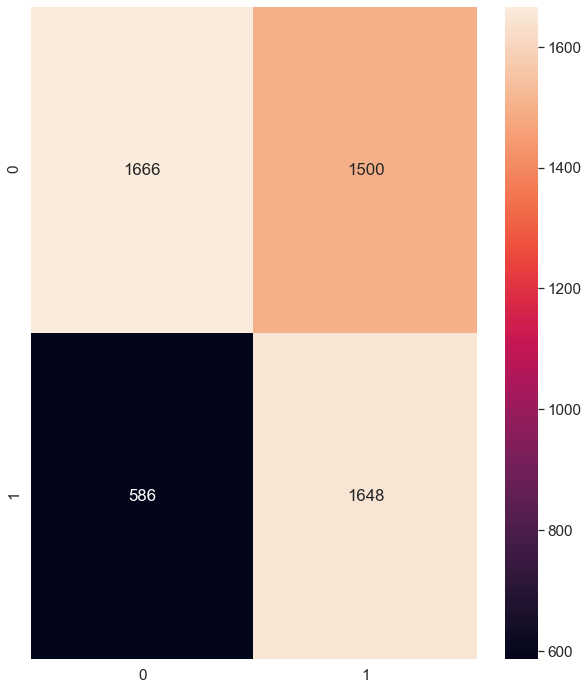

In [59]:
df_cm= pd.DataFrame(cm,index=(0,1),columns=(0,1))
plt.figure(figsize=(10,12))
sns.set(font_scale=1.4)
sns.heatmap(df_cm,annot=True,fmt='g')

print("Test Data Accuracy:",accuracy_score(y_test,y_pred))

In [61]:
from sklearn.model_selection import cross_val_score
accurecies= cross_val_score(estimator=classifier,X=x_train,y=y_train,cv=10)

In [67]:
#Analysing Coefficient
pd.concat([pd.DataFrame(x_train.columns,columns=['features']),
           pd.DataFrame(np.transpose(classifier.coef_),columns=['coef'])],axis=1)

,features,coef
0,age,-0.167784
1,deposits,0.398056
2,withdrawal,0.031809
3,purchases_partners,-0.737505
4,purchases,-0.525298
5,cc_taken,0.096215
6,cc_recommended,0.103778
7,cc_disliked,0.026701
8,cc_liked,-0.009183
9,cc_application_begin,0.040896


In [68]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

classifier=LogisticRegression()
rfe= RFE(classifier,20)
rfe= rfe.fit(x_train,y_train)

c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


In [69]:
print(rfe.support_)

[ True  True False  True  True  True  True False False  True False  True
  True False  True False  True  True  True  True  True  True False False
  True  True False False False  True False False False False False False
 False False False  True False]


In [70]:
x_train.columns[rfe.support_]

Index(['age', 'deposits', 'purchases_partners', 'purchases', 'cc_taken',
       'cc_recommended', 'cc_application_begin', 'web_user', 'ios_user',
       'registered_phones', 'cancelled_loan', 'received_loan', 'rejected_loan',
       'left_for_two_month_plus', 'left_for_one_month', 'reward_rate',
       'housing_R', 'payment_type_Bi-Weekly', 'zodiac_sign_Aquarius',
       'zodiac_sign_Taurus'],
      dtype='object')

In [78]:
from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression(random_state=0)
classifier.fit(x_train[x_train.columns[rfe.support_]],y_train)

y_pred= classifier.predict(x_test[x_test.columns[rfe.support_]])

In [82]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

cm= confusion_matrix(y_test,y_pred)
print("Accuracy SCore:",accuracy_score(y_test,y_pred))
print("Recall score:",recall_score(y_test,y_pred))
print("F1 Score:",f1_score(y_test,y_pred))

Accuracy SCore: 0.6142592592592593
Recall score: 0.7394807520143241
F1 Score: 0.6133283831446074


In [84]:
pd.concat([pd.DataFrame(x_train.columns[rfe.support_],columns=['features']),
           pd.DataFrame(np.transpose(classifier.coef_),columns=['Coef'])],axis=1)

,features,Coef
0,age,-0.173329
1,deposits,0.417298
2,purchases_partners,-0.731944
3,purchases,-0.529479
4,cc_taken,0.098594
5,cc_recommended,0.102098
6,cc_application_begin,0.047503
7,web_user,0.122595
8,ios_user,0.095372
9,registered_phones,0.110461


In [87]:
final_result= pd.concat([y_test,user_identifier],axis=1).dropna()

In [88]:
final_result

,churn,user
4,1.0,61353
7,0.0,67679
8,0.0,21269
18,0.0,69531
22,0.0,25997
...,...,...
26982,0.0,22377
26991,1.0,24291
26993,0.0,23740
26994,1.0,47663


In [92]:
final_result['predicted_churn']=y_pred
final_result=final_result[['user','churn','predicted_churn']].reset_index(drop=True)

In [93]:
final_result

,user,churn,predicted_churn
0,61353,1.0,1
1,67679,0.0,0
2,21269,0.0,0
3,69531,0.0,1
4,25997,0.0,0
...,...,...,...
5395,22377,0.0,0
5396,24291,1.0,1
5397,23740,0.0,1
5398,47663,1.0,0
